# <b><u> A Picture is worth a thousand words! </b></u>

## <b> Introducing Matplotlib and Seaborn for data visualization

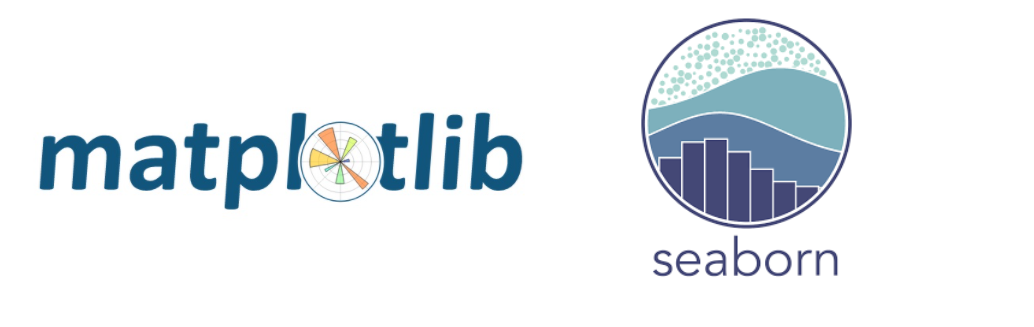

## Matplotlib.Pyplot
* One of the core aspects of Matplotlib is matplotlib.pyplot. It is Matplotlib's scripting layer. It is a collection of command style functions that make Matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. We will work both with the scripting and artist layer.

## Let's jump directly onto the data which we will use today for demonstrating the utiltiies of Matplotlib 

* Price Paid Data tracks the residential property sales in England and Wales that are lodged with HM Land Registry for registration.

* The dataset is a reliable source of house price information and consists of more than a million definitive records for the annual year 2018

In [46]:
# from google.colab import drive
# drive.mount('/content/drive')

In [144]:
# Import pandas 
import pandas as pd
import numpy as np
from icecream import ic as printic

In [48]:
path = r"C:\Users\Admin\PycharmProjects\Practice\ALmabetter\datasets\Data Visualization AB\pp-2018.csv"
df = pd.read_csv(path , names = ["TID","Price","Sale Date", "Postcode",
                                    "Property Type","New Build","Tenure",
                                    "PAON","SAON","Street","Locality",
                                    "Town/City","District","County",
                                    "PPD Category","Record Status"],
                            parse_dates= ["Sale Date"])

In [49]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


### Below is a description of the columns/variables in our Price Paid data

* Transaction unique identifier --- A reference number which is generated automatically recording each published sale. 
                                The number is unique and will change each time a sale is recorded.
* Price ---- Sale price stated on the transfer deed.
* Date of Transfer ---- Date when the sale was completed, as stated on the transfer deed.
* Postcode ---- This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated    and these changes are not reflected in the Price Paid Dataset.
* Property Type ---- D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other
* Newly built  ----- Y = a newly built property, N = an established residential building
* Duration	Relates to the tenure: F = Freehold, L= Leasehold etc.

* Street
* Locality 
* Town/City 
* District
* County 
* PPD Category Type ---- Indicates the type of Price Paid transaction.

* Record Status - monthly file only --- Indicates additions, changes and deletions to the records.(see guide below).
                                    A = Addition, C = Change, D = Delete.



In [50]:
df.shape

(1024432, 16)

* Next we will filter the data to get all the transaction for a particular year and month ( say July 2018 for example). We will only keep transactions of type "A" (Additions) in the data frame and get rid of Changes and Deletions. And for the sake of simplicity we will also remove transactions for property type "O" (Other) and focus only on Detached ("D"), Semi Detached ("S"), Flats ("F") and Terraced ("T") houses.

In [51]:
#Select only record type A and property type not "O"
df = df.loc[df['Record Status'] == 'A']
df = df.loc[df['Property Type'] != 'O']

# Select transactions for 2018
df = df[(df["Sale Date"].dt.year==2018)]

In [52]:
(df["Sale Date"].dt.year == 2018).sum()

959003

In [53]:
df.shape

(959003, 16)

## First objective : Obtain the trend of sales volume across months

### Our first step would be to add the below two lines of code for importing the matplotlib.pyplot and to set the output of the plotting to be displayed inline.

* **%matplotlib inline** sets the backend of matplotlib to the 'inline' backend 
* With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [42]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [77]:
from datetime import datetime

# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
# Create a variable month to denote the transaction month
df['Month']= df['Sale Date'].apply(lambda x: x.strftime("%Y-%m-%d") [:7])


In [81]:
df.rename(columns={"Sale Date":"Sale_Date"}, inplace=True)

In [90]:
#perform with assign
# def ret_st(dtObj):

df = df.assign(Month=lambda x:x.Sale_Date.dt.month)
df.head()


,TID,Price,Sale_Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,1
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,1
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,1
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A,1
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A,1


1     65004
2     66959
3     78070
4     67094
5     76325
6     90178
7     83082
8     95382
9     77836
10    86892
11    92427
12    79754
Name: Month, dtype: int64

In [104]:
monthly_sales_vol = df["Month"].value_counts().sort_index()

In [99]:
type(monthly_sales_vol)

pandas.core.series.Series

In [147]:
zip_object = monthly_sales_vol.items()   # on series object
first_list, second_list = zip(*zip_object)  # To unzip a zip file.
print(list(monthly_sales_vol.items()))
print(first_list)
print(second_list)


[(1, 65004), (2, 66959), (3, 78070), (4, 67094), (5, 76325), (6, 90178), (7, 83082), (8, 95382), (9, 77836), (10, 86892), (11, 92427), (12, 79754)]
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(65004, 66959, 78070, 67094, 76325, 90178, 83082, 95382, 77836, 86892, 92427, 79754)


In [110]:
#using GroupBy
groupByobject= df.groupby("Month")

In [116]:
groupByobject["TID"].count().reset_index().rename(columns={"TID": "Monthly Sales"})

,Month,Monthly Sales
0,1,65004
1,2,66959
2,3,78070
3,4,67094
4,5,76325
5,6,90178
6,7,83082
7,8,95382
8,9,77836
9,10,86892


In [121]:
plt.rcParams['figure.figsize'] = (20, 10)

In [164]:
import inspect
help(plt.rcParams)

Help on RcParams in module matplotlib object:

class RcParams(collections.abc.MutableMapping, builtins.dict)
 |  RcParams(*args, **kwargs)
 |  
 |  A dictionary object including validation.
 |  
 |  Validating functions are defined and associated with rc parameters in
 |  :mod:`matplotlib.rcsetup`.
 |  
 |  The list of rcParams is:
 |  
 |  - backend
 |  - backend_fallback
 |  - toolbar
 |  - interactive
 |  - timezone
 |  - webagg.port
 |  - webagg.address
 |  - webagg.open_in_browser
 |  - webagg.port_retries
 |  - lines.linewidth
 |  - lines.linestyle
 |  - lines.color
 |  - lines.marker
 |  - lines.markerfacecolor
 |  - lines.markeredgecolor
 |  - lines.markeredgewidth
 |  - lines.markersize
 |  - lines.antialiased
 |  - lines.dash_joinstyle
 |  - lines.solid_joinstyle
 |  - lines.dash_capstyle
 |  - lines.solid_capstyle
 |  - lines.dashed_pattern
 |  - lines.dashdot_pattern
 |  - lines.dotted_pattern
 |  - lines.scale_dashes
 |  - markers.fillstyle
 |  - pcolor.shading
 |  - pcolo

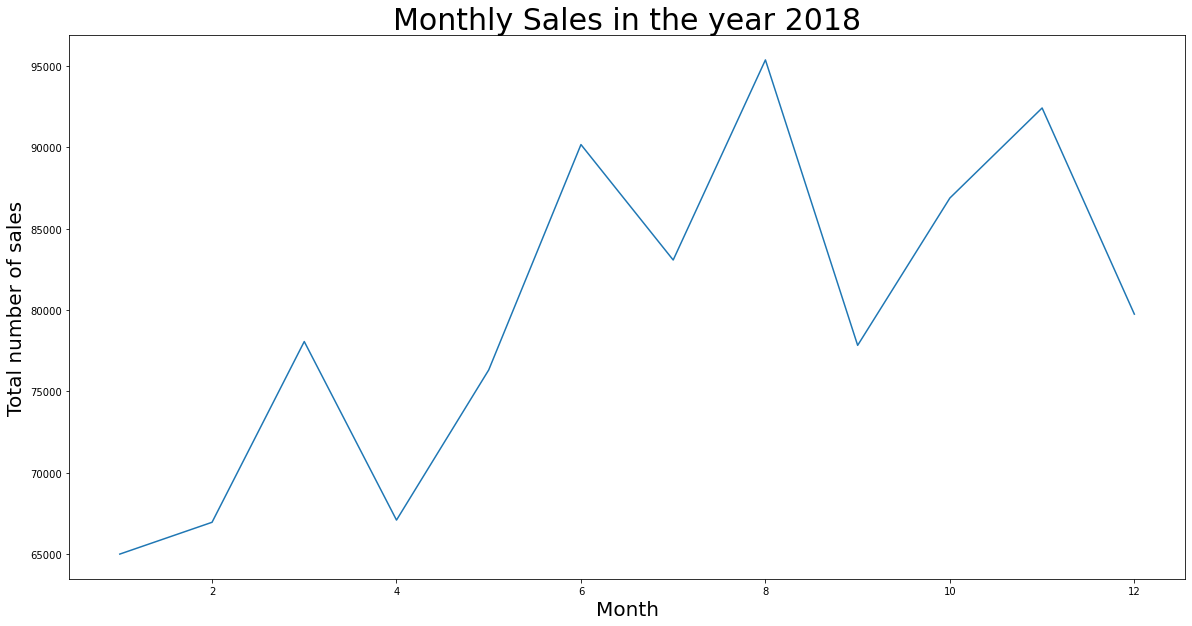

In [170]:
# Create the plot object
plt.plot(monthly_sales_vol)

plt.title('Monthly Sales in the year 2018', fontdict = {'fontsize' : 30} )
plt.ylabel('Total number of sales',fontdict = {'fontsize' : 20})
plt.xlabel('Month', fontdict = {'fontsize' : 20})

plt.show()

## Second objective :  Observe the daily sales volume in the month of July 2018

In [173]:
# Daily sales volume for July 2018
df = df[df['Sale_Date'].dt.month == 7]

daily_sales_vol = df["Sale_Date"].value_counts()

In [178]:
daily_sales_vol.sort_index(inplace=True)

### Creating a Line plot 

Text(0.5, 0, 'Date')

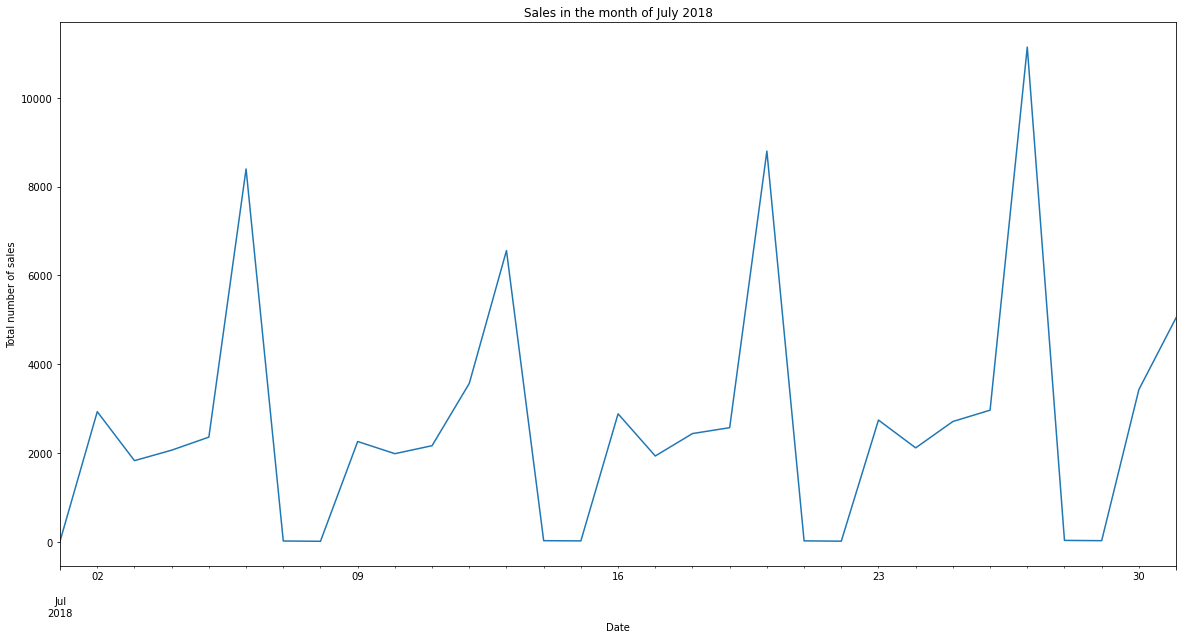

In [179]:
# Create the plot object
daily_sales_vol.plot()

plt.title('Sales in the month of July 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Date')
# plt.rcParams['figure.figsize'] = (10, 5)

## Third Objective :  Comparing the daily sales volume of different property types in July

### Creating mutliple line plots in the same figure

In [181]:
daily_price = df.groupby(['Sale_Date','Property Type'])['Sale_Date'].count().unstack()

In [ ]:
daily_price

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


In [ ]:
df.groupby(['Sale Date','Property Type'])['Sale Date'].count()

Sale Date   Property Type
2018-07-01  D                   4
            F                   2
            S                   7
            T                   5
2018-07-02  D                 705
                             ... 
2018-07-30  T                 976
2018-07-31  D                1316
            F                1014
            S                1353
            T                1364
Name: Sale Date, Length: 124, dtype: int64

In [ ]:
daily_price.columns

Index(['D', 'F', 'S', 'T'], dtype='object', name='Property Type')

In [ ]:
daily_price

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


Text(0.5, 0, 'Date')

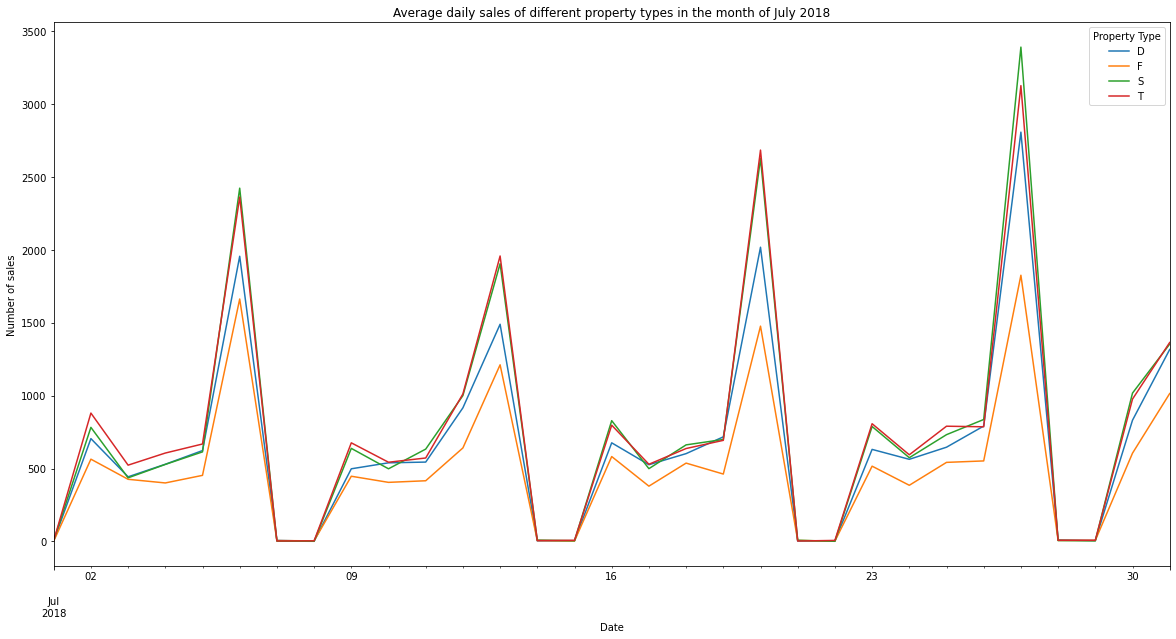

In [184]:
###### daily_price = df.groupby(['Sale Date','Property Type'])['Sale Date'].count().unstack()
daily_price.plot()

plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')

# plt.rcParams['figure.figsize'] = (10, 5)

### Creating a bar plot

* A bar chart is really helpful when we want to see for example the total sales volume by different Property types. 
* To check how a particular variable varies across different categories/groups of another variable we use a Bar plot

* To plot a horizontal bar chart, we set the argument kind='barh'. The sort_values() function sorts the values in ascending order by default.

## Fourth Objective :  Draw comparison among different property types in terms of sales

In [185]:
# Number of residential property transactions in Aug 2018 by property type
sales_by_type = df["Property Type"].value_counts()

In [ ]:
sales_by_type

T    23630
S    23501
D    20406
F    15545
Name: Property Type, dtype: int64

Text(0.5, 0, 'Property Type')

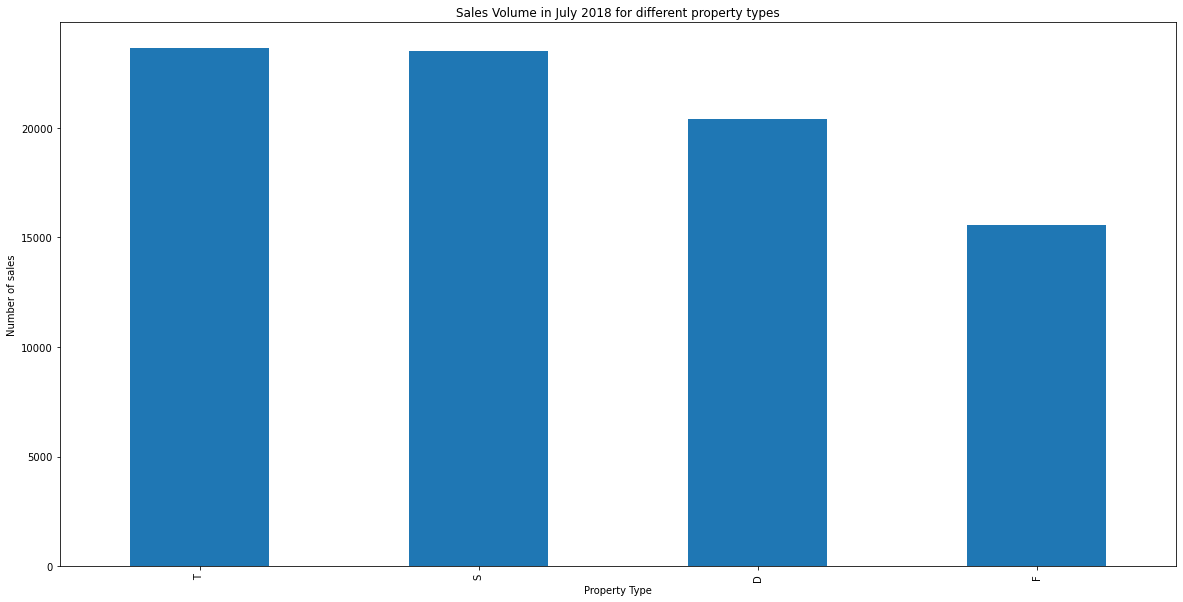

In [186]:
# Create the plot object
sales_by_type.plot(kind='bar')

plt.title('Sales Volume in July 2018 for different property types')
plt.ylabel('Number of sales')
plt.xlabel('Property Type')

# Set the display figure size using rcParams method 
# plt.rcParams['figure.figsize'] = (10, 5)

## Fourth Objective : Average house prices for different property types in July

## Using an Axes instance from Matplotlib

In [187]:
avg_price_ppt_type = df.groupby(['Property Type'])['Price'].mean()

In [188]:
avg_price_ppt_type

Property Type
D    420870.312359
F    306578.147507
S    260353.586613
T    248855.367203
Name: Price, dtype: float64

Text(0, 0.5, 'Average prices ')

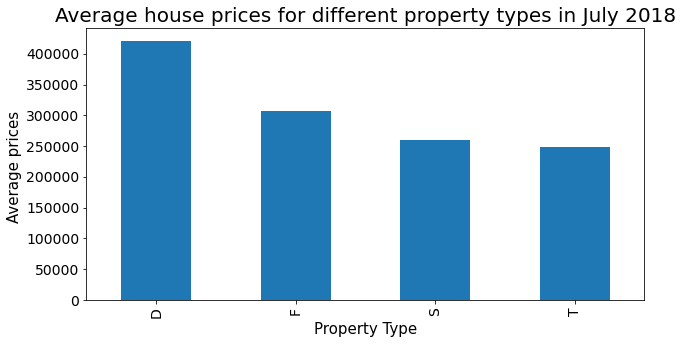

In [189]:
# Create the figure object 
ax = avg_price_ppt_type.plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Average house prices for different property types in July 2018", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Property Type", fontsize = 15)
ax.set_ylabel("Average prices ", fontsize = 15)

In [ ]:
df.describe()

,Price
count,8.308200e+04
mean,3.051571e+05
std,3.309047e+05
min,1.000000e+00
25%,1.520000e+05
50%,2.350000e+05
75%,3.630000e+05
max,2.121000e+07


## Box plot

* Also called as **box and whisker plot**, is a way of showing the distribution of data in a five-number summary.

* Below we will create a box plot which shows the price distribution for all the four different property types.

## Fifth Objective : Obtain the average house price distribution for different property types

In [192]:
df.rename(columns={"Sale_Date":"Sale Date"}, inplace=True)

In [193]:
df.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack()

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,540000.000000,109000.000000,172571.428571,217400.000000
2018-07-02,445515.668085,350084.714539,270838.773657,255916.592045
2018-07-03,447700.440181,373247.507042,247046.855505,269273.124283
2018-07-04,438009.792060,334057.576060,280296.412879,242835.457096
2018-07-05,458506.836276,333304.015453,269661.234528,245529.871257
2018-07-06,388179.344246,280558.135379,248347.932700,223573.152478
2018-07-07,383420.714286,267990.833333,157500.000000,490333.333333
2018-07-08,213500.000000,147123.750000,245000.000000,116250.000000
2018-07-09,401749.847390,301908.429530,265197.501567,291172.751479


Text(0.5, 0, 'Property Type')

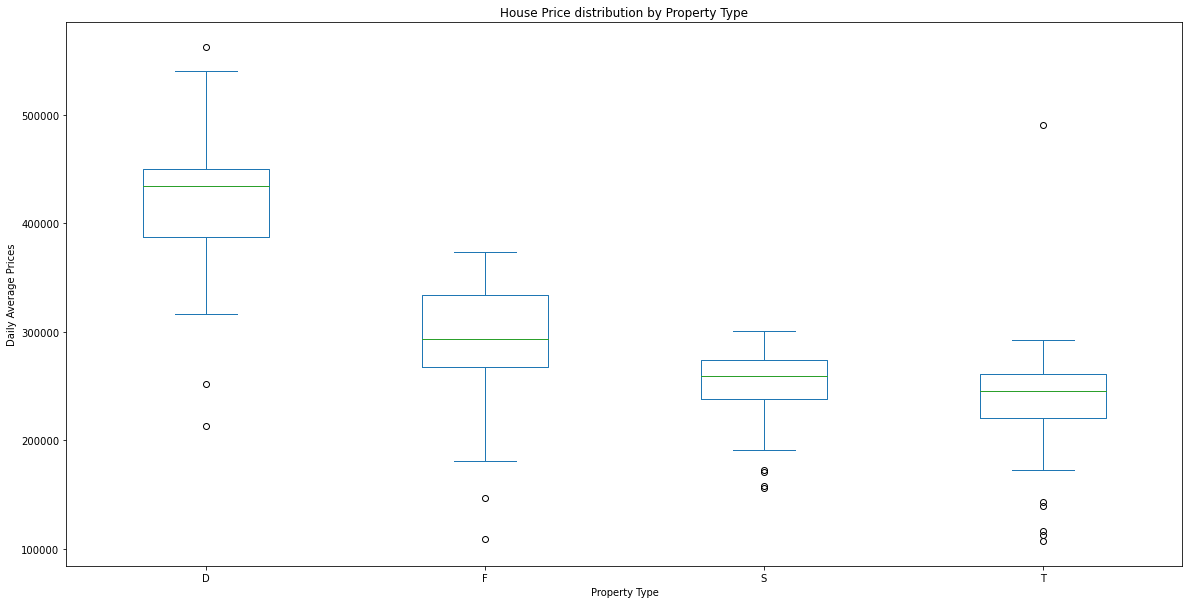

In [205]:
# Price distribution box plot
df.groupby(['Sale Date', 'Property Type'])["Price"].mean().unstack().plot(kind="box")
plt.title('House Price distribution by Property Type')
plt.ylabel('Daily Average Prices')
plt.xlabel('Property Type')

Whiskers are set at 1.5 * IQR ( Q3 - Q1)

# Exploring Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

## Speed Dating Dataset

In [207]:
path = r"C:\Users\Admin\PycharmProjects\Practice\ALmabetter\datasets\Data Visualization AB\Speed Dating Data.csv"
dating_data = pd.read_csv(path, encoding = 'unicode_escape')

In [208]:
dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [212]:
dating_data.columns.values[:10]

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order'], dtype=object)

# Histogram

In [213]:
import numpy as np

Text(0, 0.5, 'Frequency')

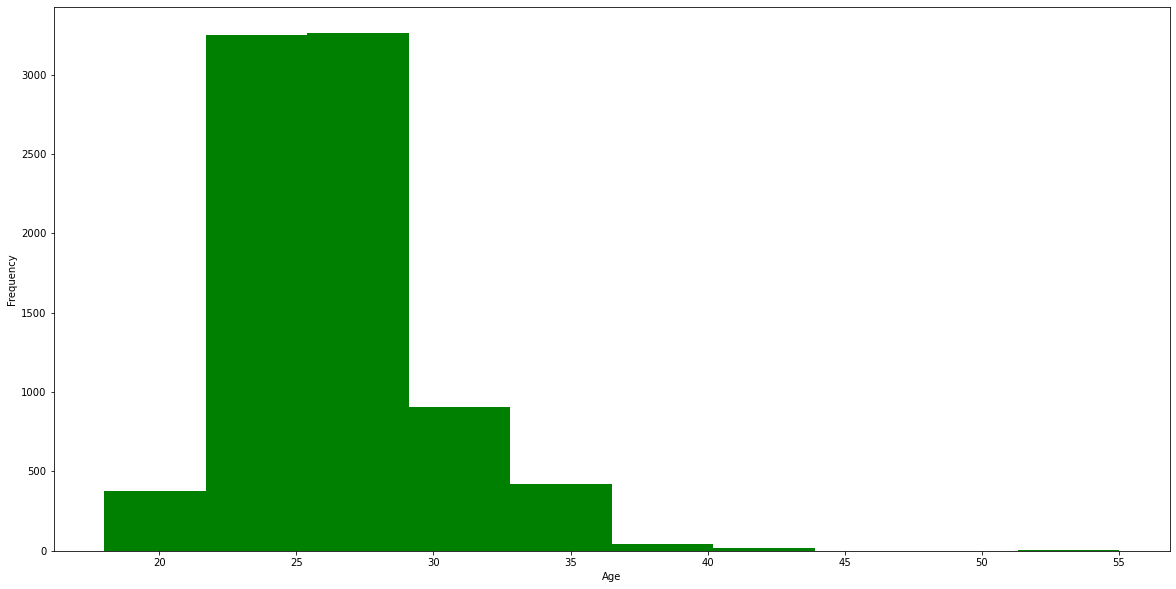

In [214]:
age = dating_data[~dating_data['age'].isna()]['age']
plt.hist(age.values, color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [215]:
import seaborn as sns

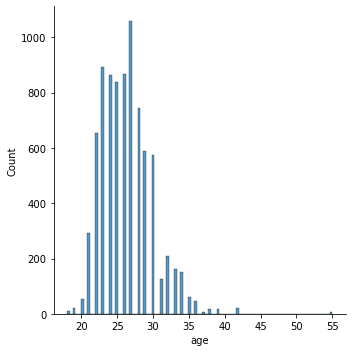

In [218]:
sns.displot(age)

# Understanding correlation

In [229]:
# Positively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 3, 4, 6, 6, 7, 8, 9, 10, 11]

In [233]:
# Negatively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [11, 10, 9, 8, 7, 6, 6, 4, 3, 2]

In [237]:
# Zero correlation
x = [1, 2, 1, 2]
y = [1, 2, 2, 1]

In [238]:
df = pd.DataFrame(data={'x': x, 'y': y})

In [239]:
df

,x,y
0,1,1
1,2,2
2,1,2
3,2,1


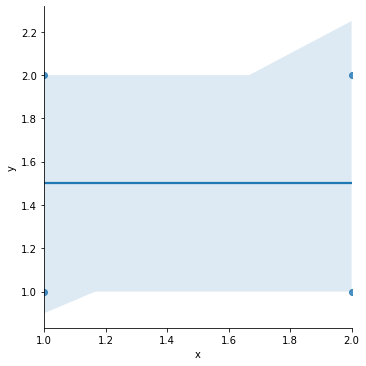

In [240]:
sns.lmplot(x='x', y='y', data=df)

In [241]:
df.corr()

,x,y
x,1.0,0.0
y,0.0,1.0


# Correlation Heatmap

In [242]:
dating_data_df = dating_data[['gender', 'shopping', 'gaming', 'concerts', 'music']]

In [243]:
corr_df = dating_data_df.corr()

In [244]:
corr_df

,gender,shopping,gaming,concerts,music
gender,1.000000,-0.330718,0.219619,-0.128339,-0.076850
shopping,-0.330718,1.000000,0.093467,0.205389,0.208329
gaming,0.219619,0.093467,1.000000,0.098806,0.043301
concerts,-0.128339,0.205389,0.098806,1.000000,0.655728
music,-0.076850,0.208329,0.043301,0.655728,1.000000


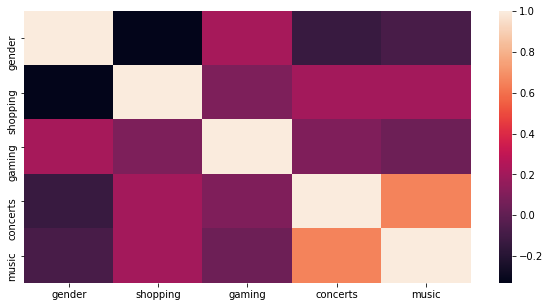

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

### Make the map more intuitive

* Set the minimum value for the color scale at -1
* Make your heatmap more visually pleasing : https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
* Annotate values

<AxesSubplot:>

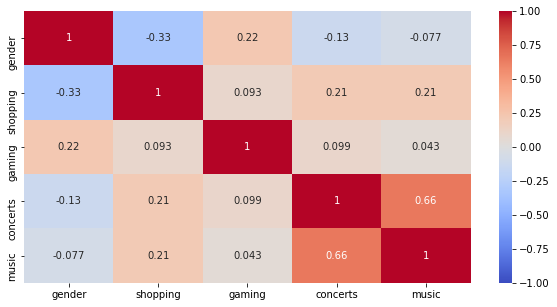

In [245]:
plt.figure(figsize=(10,5))
sns.heatmap(dating_data_df.corr(), vmin=-1, cmap='coolwarm', annot=True)

# Two-way Plots

In [246]:
dating_data_df.head()

,gender,shopping,gaming,concerts,music
0,0,8.0,1.0,10.0,9.0
1,0,8.0,1.0,10.0,9.0
2,0,8.0,1.0,10.0,9.0
3,0,8.0,1.0,10.0,9.0
4,0,8.0,1.0,10.0,9.0


In [249]:
dating_data_df.shape

(8378, 5)

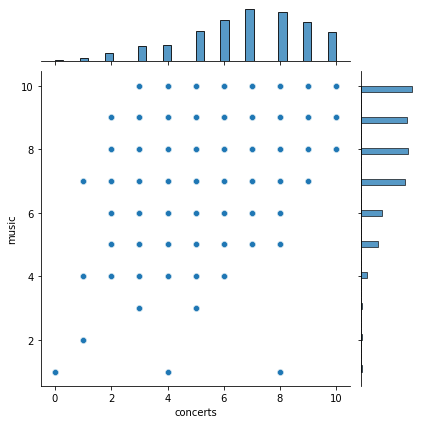

In [250]:
sns.jointplot(x='concerts', y='music', data=dating_data_df)

In [251]:
dating_data_df[(dating_data_df['concerts'] == 6) & (dating_data_df['music'] == 8)]

,gender,shopping,gaming,concerts,music
130,1,6.0,8.0,6.0,8.0
131,1,6.0,8.0,6.0,8.0
132,1,6.0,8.0,6.0,8.0
133,1,6.0,8.0,6.0,8.0
134,1,6.0,8.0,6.0,8.0
...,...,...,...,...,...
7801,0,4.0,5.0,6.0,8.0
7802,0,4.0,5.0,6.0,8.0
7803,0,4.0,5.0,6.0,8.0
7804,0,4.0,5.0,6.0,8.0
